**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab21](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab21/Lab21.ipynb)

___

# <font color=darkred>Laboratory 21: "Towards Hypothesis Testing"</font>

**Medrano, Giovanni**

**R11521018**

ENGR 1330 Laboratory 21 - In-Lab

## Hypothesis Testing

Hypothesis tests are methods to quantify if two groups of data are similar or different.
In this lab we will just get started using mostly exploratory data analysis and histograms, and will explore the concept in increasing detail over the next few labs.

First import some necessary packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next lets get a database to work with, in this case the database is simply two collections of numerical values.

In [2]:
######### CODE TO AUTOMATICALLY DOWNLOAD THE DATABASE ################
#! pip install requests #install packages into local environment
import requests # import needed modules to interact with the internet
# make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'http://54.243.252.9/engr-1330-webroot/8-Labs/Lab21/Lab21_data.csv' # a csv file
response = requests.get(remote_url) # Gets the file contents puts into an object
output = open('Lab21_data.csv', 'wb') # Prepare a destination, local
output.write(response.content) # write contents of object to named local file
output.close() # close the connection

In [3]:
mydata = pd.read_csv("Lab21_data.csv") 
mydata

,Set1,Set2
0,46.688625,512.459480
1,44.825192,480.551364
2,71.453564,560.502112
3,30.360172,503.885912
4,47.657087,458.124749
...,...,...
95,60.040915,462.122309
96,21.527991,509.909507
97,59.523999,572.309957
98,38.173070,562.580099


### Question 1

What are the names of the two series in "mydata"?

# The two names are Set1 and Set2.

### Question 2

Describe the two data series, which has a larger mean value, which has a larger variance?

In [4]:
# put your answer here
import statistics
mydata.describe()

,Set1,Set2
count,100.000000,100.000000
mean,48.566581,508.276381
std,15.861475,47.978391
min,13.660911,408.244489
25%,38.229562,470.288351
50%,49.369139,507.096010
75%,59.580899,541.199481
max,86.356515,629.497949


In [5]:
set1 = statistics.mean(mydata['Set1'])
set2 = statistics.mean(mydata['Set2'])
print('Set one mean is:', set1)
print('Set two mean is:', set2)

Set one mean is: 48.566581065754555
Set two mean is: 508.2763812929764


In [6]:
mydata.var()

Set1     251.586400
Set2    2301.925985
dtype: float64

# Set2 has a higher mean value, and set two also has a higher variance

Now lets prepare histograms of the two data series, an easy way to generate two histoprgams on the same plot is listed below

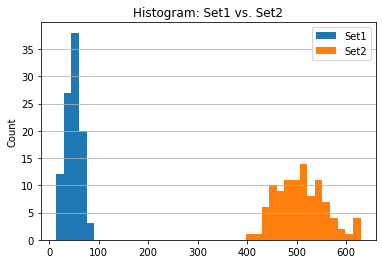

In [7]:
fig, ax = plt.subplots()
mydata.plot.hist(density=False, ax=ax, title='Histogram: Set1 vs. Set2', bins=40)
ax.set_ylabel('Count')
ax.grid(axis='y')

### Question 3: 

**Are the two data series similar or not?**

Describe (using words, and sentences, not the method) how the series are different.


# No the two data series are not similar at all as they vary largely in their values and their spread.

Now lets generate two more series using the descriptive statistics from "Set1" and "Set2"

In [8]:
set1_s = np.random.normal(np.array(mydata['Set1']).mean(), np.array(mydata['Set1']).std(), 100) # random sample from a normal distribution function
set2_s = np.random.normal(np.array(mydata['Set2']).mean(), np.array(mydata['Set2']).std(), 100) # random sample from a normal distribution function

Put these into a new dataframe

In [9]:
mydata_d = pd.DataFrame({'Set1s':set1_s,'Set2s':set2_s}) # make into a dataframe _d == derived

Now lets prepare histograms of the two data series, an easy way to generate two histograms on the same plot is listed below

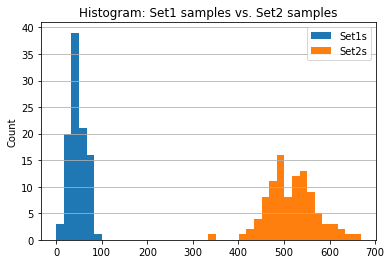

In [10]:
fig, ax = plt.subplots()
mydata_d.plot.hist(density=False, ax=ax, title='Histogram: Set1 samples vs. Set2 samples', bins=40)
ax.set_ylabel('Count')
ax.grid(axis='y')

### Question 4: 

**Are the two new data series similar or not?**

Describe (using words, and sentences, not the method) how the series are different.


# The two new data sets are very similar and that can be clearly seen from the graph.

# SET1 AND SET1S LOOK TIGHTLY PACKED TOGETHER. SET2 AND SET2S HAVE A WIDER SPREAD AROUND THE SAME AREA.

Now lets examine all 4 data series. First a histogram of all 4 on the same graph

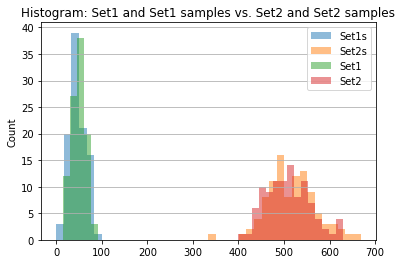

In [11]:
fig, ax = plt.subplots()
mydata_d.plot.hist(density=False, ax=ax, title='Histogram: Set1 and Set1 samples vs. Set2 and Set2 samples', bins=40,alpha=0.5)
mydata.plot.hist(density=False, ax=ax, bins=40,alpha=0.5)

ax.set_ylabel('Count')
ax.grid(axis='y')

### Question 5:

Are the series "Set1" and "Set1s" the same or different?  How do they compare? What about series "Set2" and "Set2s"?

In [19]:
# The set1 and set1s are very similar but they are not exactly the same as set1 reaches a higher total value. Same overall area

# Set2 and set2s are also very similar in which set2s reaches a higher total value. Same overall area

Another graphical tool is a set of boxplots

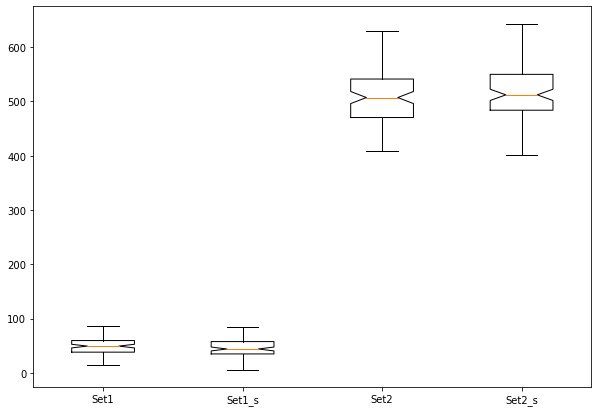

In [12]:
fig = plt.figure(figsize =(10, 7)) 

set1 =mydata['Set1']
set2 = mydata['Set2']

plt.boxplot ([set1, set1_s, set2, set2_s],1, '')
plt.xticks([1, 2, 3, 4], ['Set1', 'Set1_s', 'Set2', 'Set2_s'])
plt.show()

### Question 6

Interpret the results of the boxplot.  Are the Set2 "collections" different from the Set1 "collections"?


# Set1 and set1s are extremely similar in their boxplots.
# set2 and set2s are extremely similar in their boxplots as well.
# however set 2 collections and set1 collections are extremely different.

### Question 7

Suppose we are comparing the arithmetic means of the 4 collections.  Are the mean values of "Set1" and "Set2" far apart?  
How many "Set1" standard deviations is the "Set1" mean value from "Set2"?  How about the converse (Set2 deviations)?

In [15]:
# The mean values of set1 and set2 are very far apart.
# The std of set1 was 15.8 and the mean for set 2 was 508.
(508 - 42) / 15 # set 1

31.066666666666666

In [16]:
(508 - 42) / 48 # set 2

9.708333333333334

### Question 8
Visit [SixSigma](https://en.wikipedia.org/wiki/Six_Sigma) and after reading the Wiki, decide if the Set1 and Set2 collections are far enough apart to be considered "statistically" different.
Repeat with Set1 and Set1s - are they far apart?

In [17]:
# Yes the two are statistically different
mydata_d.describe()
mydata.describe()

,Set1,Set2
count,100.000000,100.000000
mean,48.566581,508.276381
std,15.861475,47.978391
min,13.660911,408.244489
25%,38.229562,470.288351
50%,49.369139,507.096010
75%,59.580899,541.199481
max,86.356515,629.497949


___
![](https://media2.giphy.com/media/dNgK7Ws7y176U/200.gif) <br>


## Exercise: What is the meaning of "statistically significant difference" ? <br>

    Statistically significant difference is when the data sets you are comparing are over a certain standard devation apart from each other.

#### _Make sure to cite any resources that you may use._ 

Statistically significant difference refers to a difference in values that leads the overall trend of the data to differ. This means it mathematically makes a major difference/impact on the sysytem.

![](https://64.media.tumblr.com/5c04ade79d88dde46cfab21ef3f62822/tumblr_nf7id4LDDw1rmagk1o1_640.png)